In [2]:
import keras
keras.__version__

'2.2.5'

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 0us/step


In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

from keras import optimizers
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss = losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 425us/step - loss: 0.5183 - binary_accuracy: 0.7801 - val_loss: 0.4081 - val_binary_accuracy: 0.8393
Epoch 2/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.3060 - binary_accuracy: 0.9029 - val_loss: 0.3082 - val_binary_accuracy: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.2196 - binary_accuracy: 0.9299 - val_loss: 0.3113 - val_binary_accuracy: 0.8739
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1718 - binary_accuracy: 0.9431 - val_loss: 0.2781 - val_binary_accuracy: 0.8888
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1397 - binary_accuracy: 0.9559 - val_loss: 0.2809 - val_binary_accuracy: 0.8880
Epoch 6/20
15000/15000 [==============================] - 2s 103us/step - loss: 0.1128 - binary_accuracy: 0.9664 - val_loss: 0.2946 - val_b

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [0]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

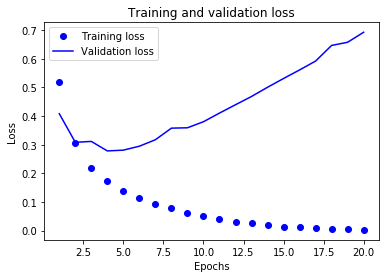

In [24]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

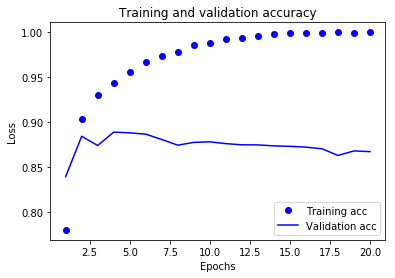

In [25]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4556 - acc: 0.8221
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.2596 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.1996 - acc: 0.9293
Epoch 4/4
25000/25000 [==============================] - 2s 74us/step


In [27]:
results

[0.2959839792251587, 0.88392]

In [28]:
model.predict(x_test)

array([[0.21121106],
       [0.99999   ],
       [0.9092969 ],
       ...,
       [0.1151455 ],
       [0.08953813],
       [0.78504217]], dtype=float32)

In [29]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.4914 - acc: 0.8272
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.3076 - acc: 0.9023
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2380 - acc: 0.9193
Epoch 4/4
25000/25000 [==============================] - 2s 79us/step


In [30]:
results

[0.28470681085586547, 0.88616]

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.4760 - acc: 0.8086
Epoch 2/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.2557 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.1966 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 84us/step


[0.3635807879686356, 0.86504]

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1493 - acc: 0.8178
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.0767 - acc: 0.9121
Epoch 3/4
25000/25000 [==============================] - 2s 62us/step - loss: 0.0573 - acc: 0.9319
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step


[0.08751507165670395, 0.88244]

In [37]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4315 - acc: 0.8251
Epoch 2/4
25000/25000 [==============================] - 2s 63us/step - loss: 0.2374 - acc: 0.9156
Epoch 3/4
25000/25000 [==============================] - 2s 64us/step - loss: 0.1817 - acc: 0.9327
Epoch 4/4
25000/25000 [==============================] - 2s 88us/step


[0.3213568819522858, 0.87704]